# 1.1) Analiza statystyczna 

Bez wykorzystania Sparka

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('yellow_tripdata_2021-01.csv', delimiter=',')
data.head()

C:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


### Opis danych pod adresem:
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Na podstawie opisu danych w kolejnej części usunięte są parametry które nie będą brane pod uwagę przy dalszym rozwiązywaniu problemów klasyfikacji i regresji

In [2]:
# zmiana kolumn z data na wartośc liczbową odpowidającą godzinie
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"]).apply(lambda x: x.hour)
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"]).apply(lambda x: x.hour)
data.rename(columns={'tpep_pickup_datetime': 'tpep_pickup_hour'}, inplace=True)
data.rename(columns={'tpep_dropoff_datetime': 'tpep_dropoff_hour'}, inplace=True)

data.drop('VendorID', inplace=True, axis=1) # nie uwzględniamy kierowców ... bo nie
data.drop('store_and_fwd_flag', inplace=True, axis=1) # mala ważny parametr
data.drop('extra', inplace=True, axis=1) # skladowa ceny końcowej
data.drop('mta_tax', inplace=True, axis=1) # skladowa ceny końcowej
data.drop('tolls_amount', inplace=True, axis=1) # skladowa ceny końcowej
data.drop('improvement_surcharge', inplace=True, axis=1) # skladowa ceny końcowej
data.drop('congestion_surcharge', inplace=True, axis=1) # skladowa ceny końcowej
data.drop('RatecodeID', inplace=True, axis=1) # malo istotny parametr
data.describe()

,tpep_pickup_hour,tpep_dropoff_hour,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount
count,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06
mean,1.376327e+01,1.389418e+01,1.411508e+00,4.631982e+00,1.652472e+02,1.614956e+02,1.280521e+00,1.209662e+01,1.918099e+00,1.747439e+01
std,4.556054e+00,4.592244e+00,1.059833e+00,3.939042e+02,6.783849e+01,7.210800e+01,4.916921e-01,1.291338e+01,2.597153e+00,1.469343e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-1.000000e+02,-4.928000e+02
25%,1.100000e+01,1.100000e+01,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,1.080000e+01
50%,1.400000e+01,1.400000e+01,1.000000e+00,1.700000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,1.860000e+00,1.380000e+01
75%,1.700000e+01,1.700000e+01,1.000000e+00,3.020000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.750000e+00,1.912000e+01
max,2.300000e+01,2.300000e+01,8.000000e+00,2.631633e+05,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,1.140440e+03,7.661280e+03


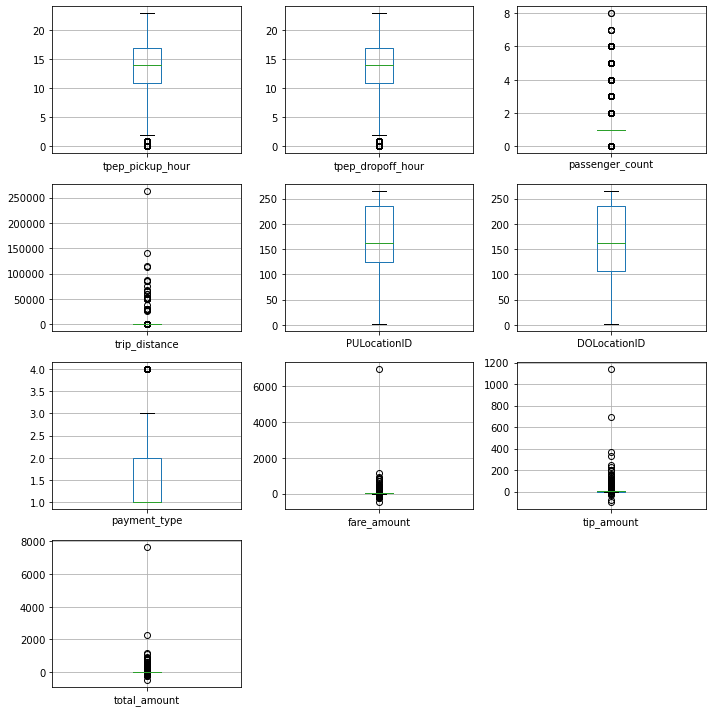

In [3]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(10,10))
for c, i in zip(data.columns, range(0,10)):
    a = data.boxplot(column=c, ax=axes.flatten()[i])
fig.delaxes(axes[3,2]) # remove empty subplot
fig.delaxes(axes[3,1]) # remove empty subplot
plt.tight_layout() 
plt.show()

# 1.2) wyeliminowanie danych odstającyh 
## i nieprawidłowych

Count of reduced rows:  83410


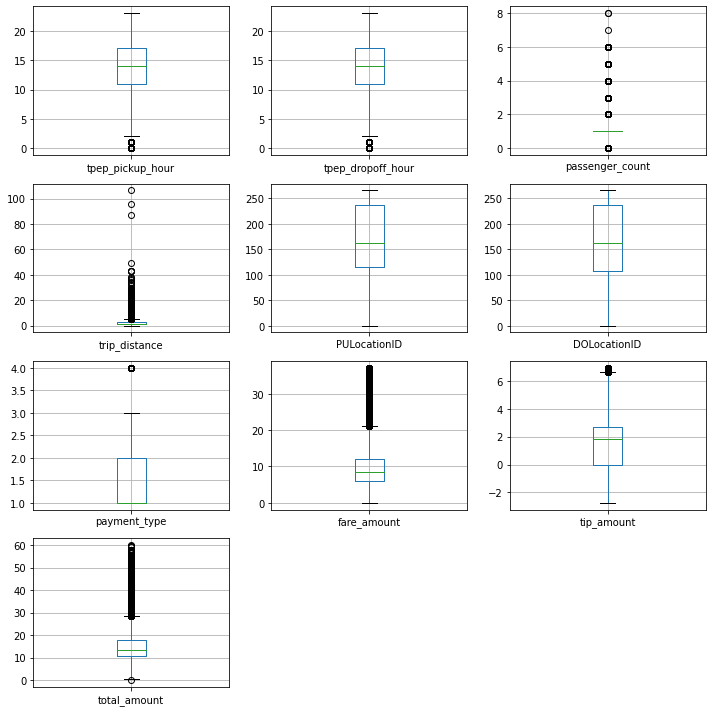

In [4]:
sizeBefore = np.shape(data)[0]
data = data[np.abs(data["trip_distance"]-data["trip_distance"].mean()) <= (3*data["trip_distance"].std())]
data = data[np.abs(data["total_amount"]-data["total_amount"].mean()) <= (3*data["total_amount"].std())]
data = data[np.abs(data["fare_amount"]-data["fare_amount"].mean()) <= (3*data["fare_amount"].std())]
data = data[np.abs(data["tip_amount"]-data["tip_amount"].mean()) <= (3*data["tip_amount"].std())]
data = data[data["total_amount"]>0] # nieprawidłowe dane
data = data[data["fare_amount"]>0] # nieprawidłowe dane

print("Count of reduced rows: ", sizeBefore - np.shape(data)[0])

fig, axes = plt.subplots(4, 3, figsize=(10,10))
for c, i in zip(data.columns, range(0,10)):
    a = data.boxplot(column=c, ax=axes.flatten()[i])
fig.delaxes(axes[3,2]) # remove empty subplot
fig.delaxes(axes[3,1]) # remove empty subplot
plt.tight_layout() 
plt.show()

reszta danych odstających zostanie uwzględniona, gdyż nie koniecznie muszą mieć negatywny wpływ na skuteczności modeli klasyfikacji i regresji 

array([[<AxesSubplot:title={'center':'tpep_pickup_hour'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_hour'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>],
       [<AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'fare_amount'}>,
        <AxesSubplot:title={'center':'tip_amount'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

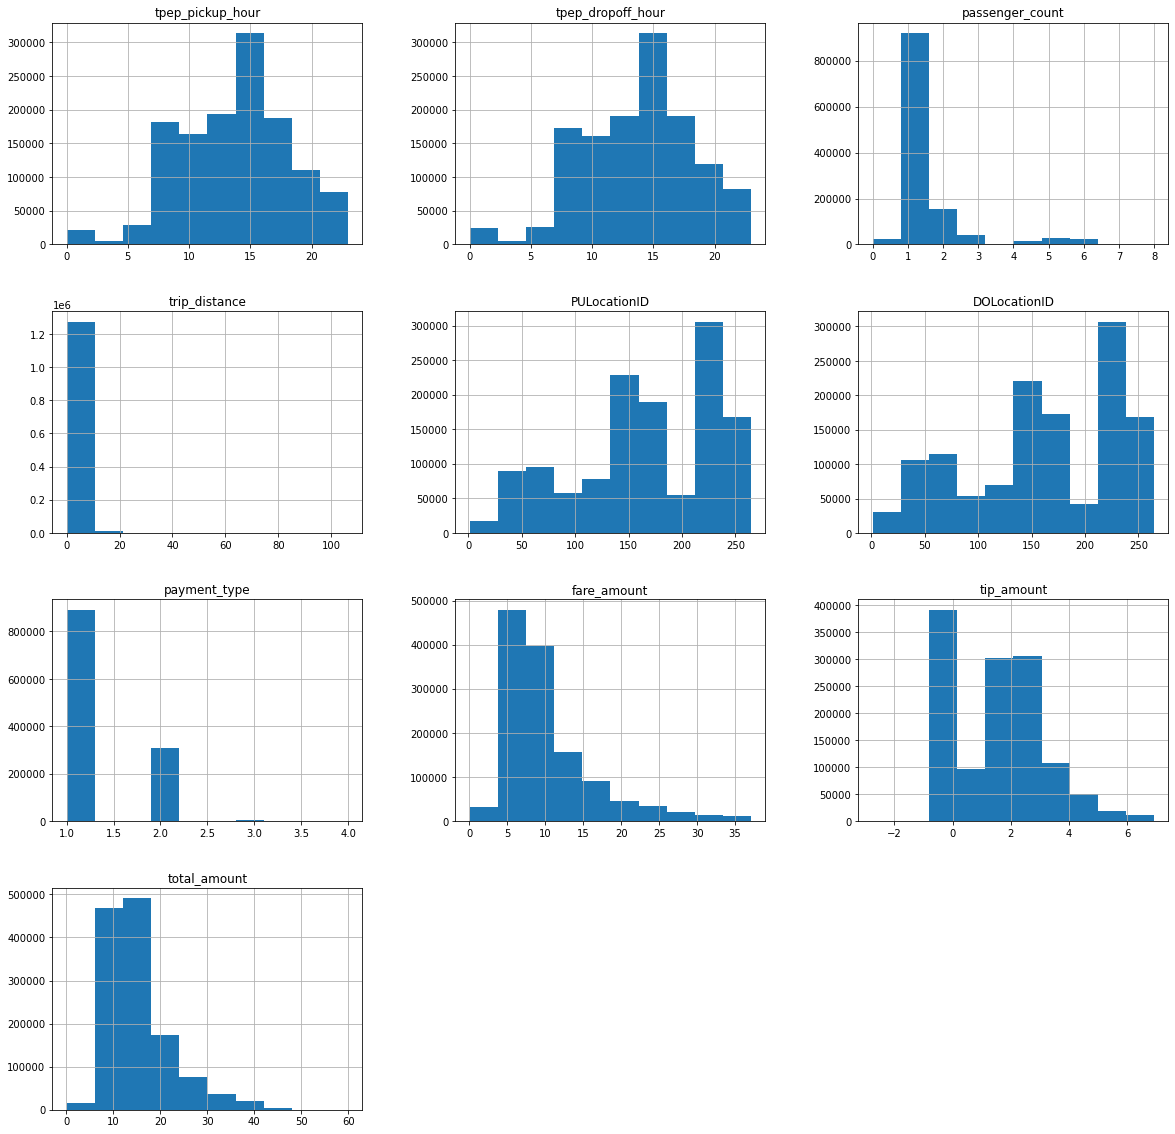

In [5]:
data.hist(figsize=(20, 20))

<AxesSubplot:>

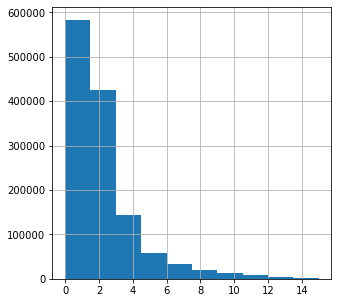

In [6]:
data[data["trip_distance"] < 15].trip_distance.hist(figsize=(5, 5))

# 1.3) Sprawdzenie korelcaji danych

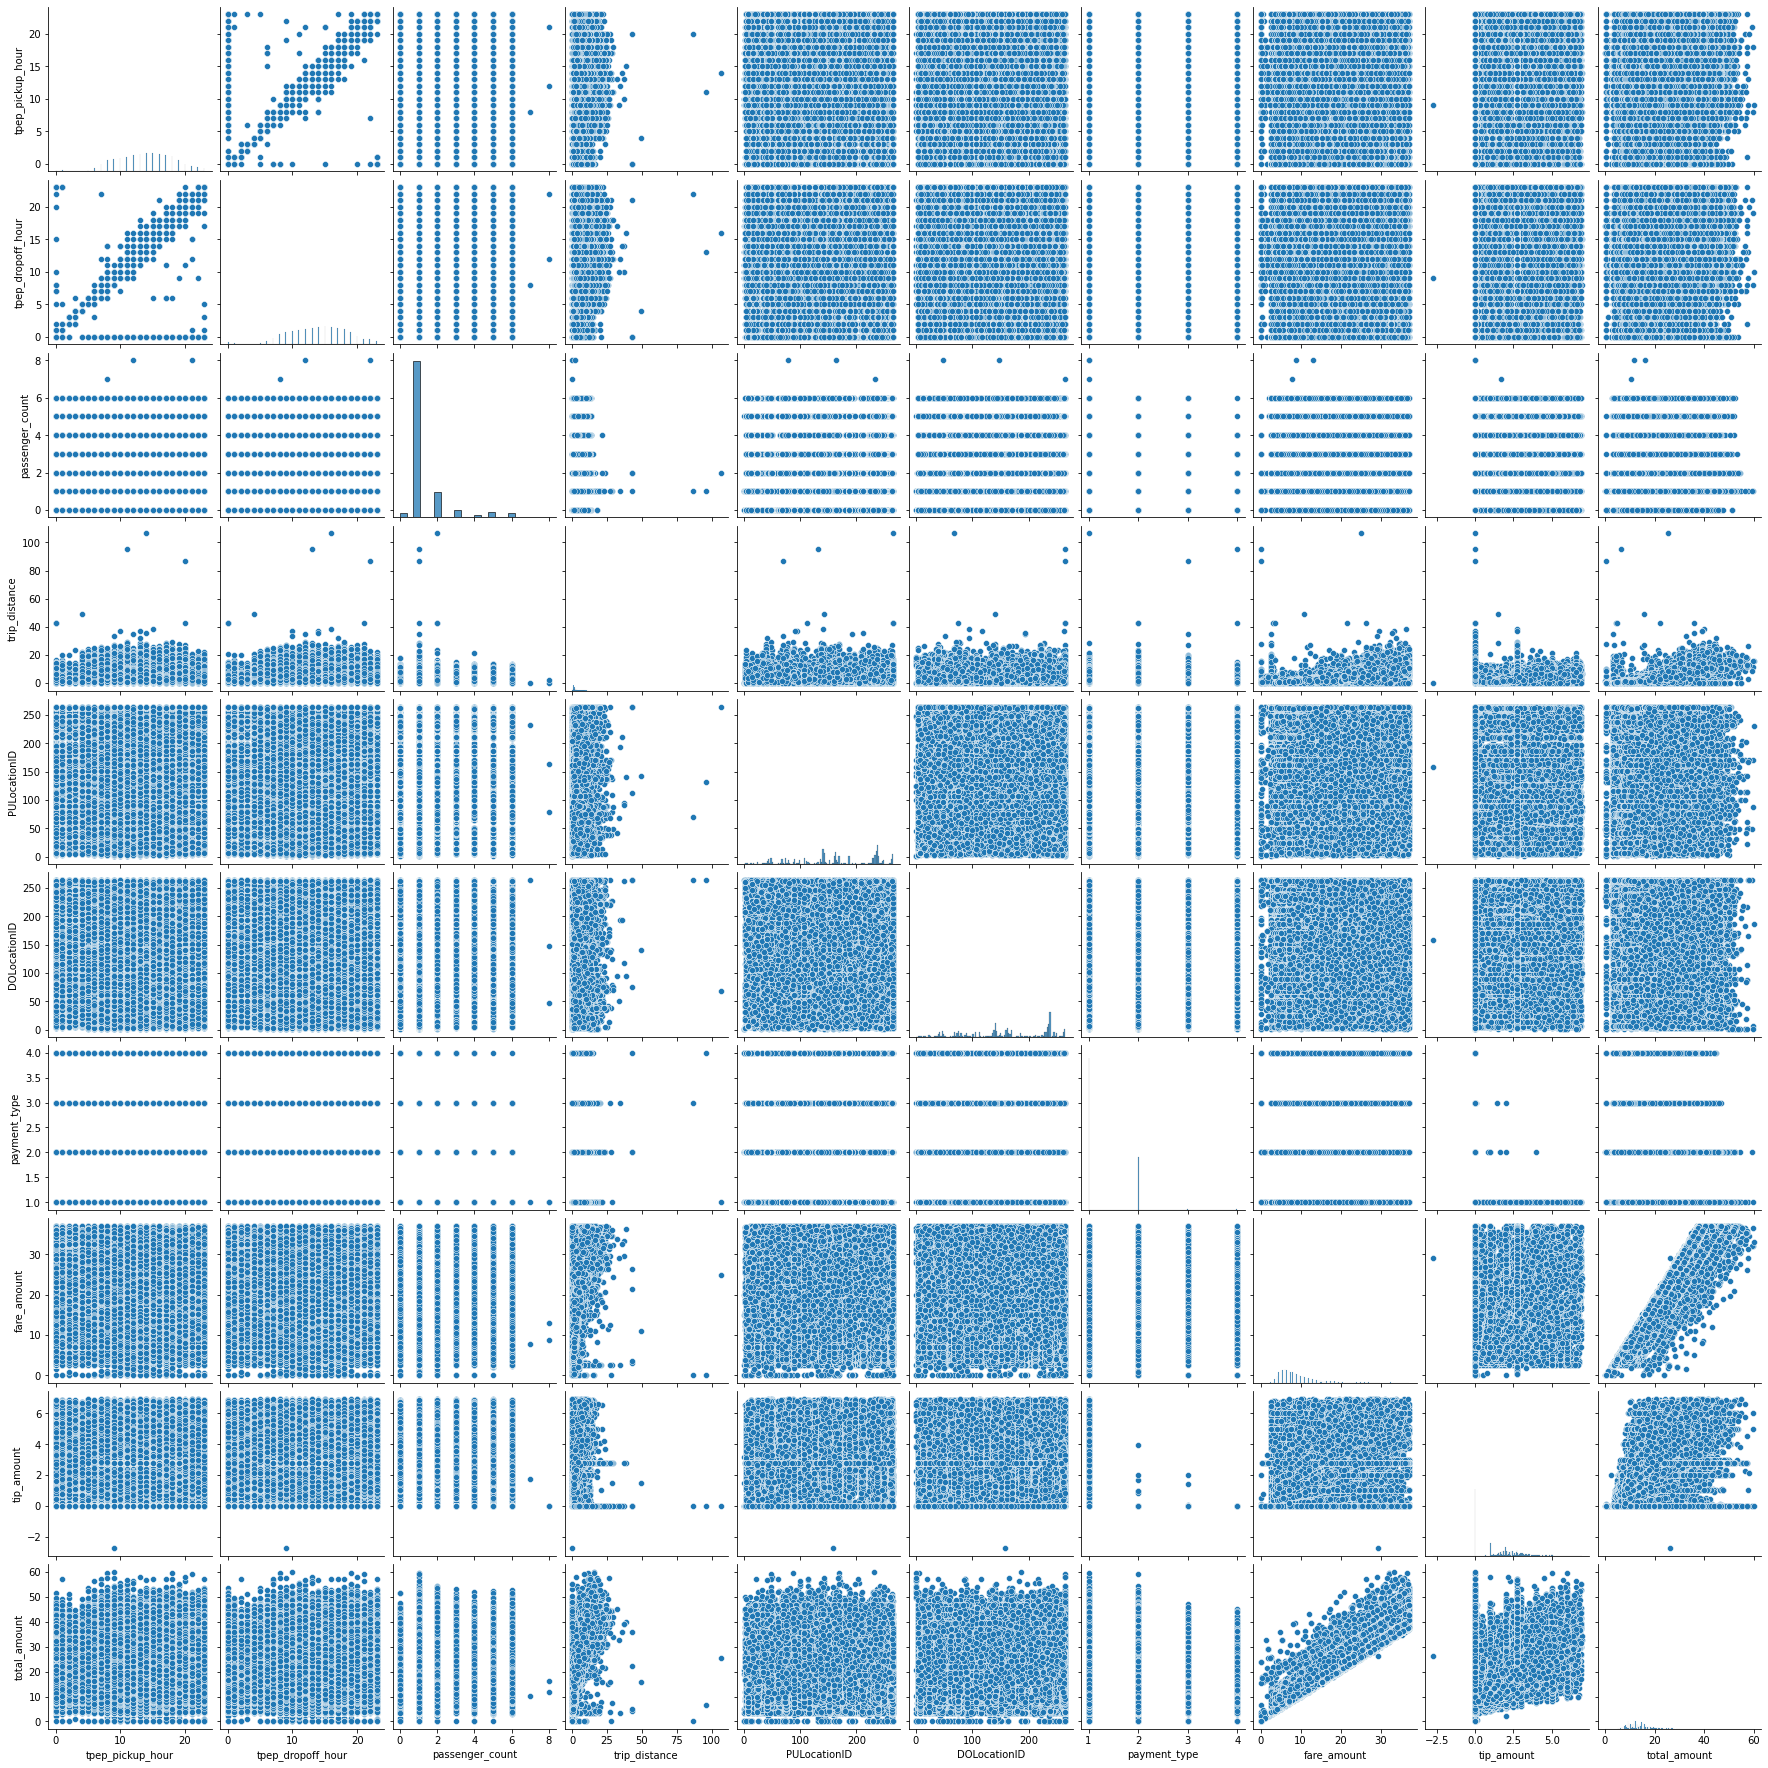

In [7]:
import seaborn as sns

sns.pairplot(data)

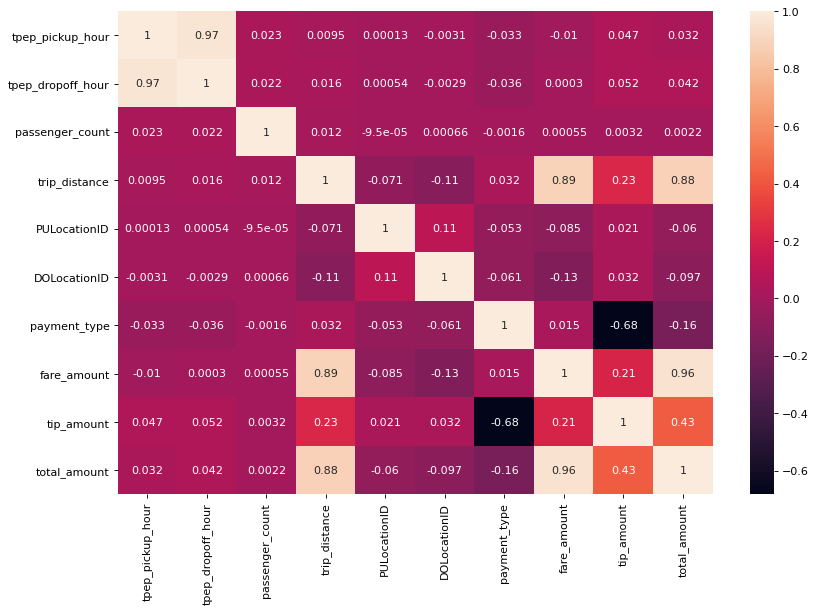

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

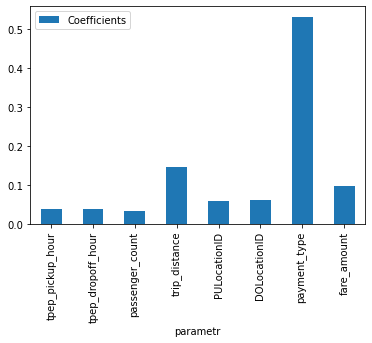

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

dataCopy = data.head(20000).copy()
dataCopy.drop('total_amount', inplace=True, axis=1) # malo istotny parametr

def splitOfData(dataInput, testSize, random_state = 50):
    m, n = dataInput.shape
    Y = dataInput["tip_amount"]
    X = dataInput.loc[:, dataInput.columns != "tip_amount"]
    train_pct_index = int((1 - testSize) * len(X))
    X_train, X_test = X[:train_pct_index], X[train_pct_index:]
    y_train, y_test = Y[:train_pct_index], Y[train_pct_index:]
    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = splitOfData(dataCopy, 0.2)

extra_tree_model = ExtraTreesRegressor(n_estimators = 100, max_features = "auto")
extra_tree_model.fit(x_train, y_train)

feature_importance = extra_tree_model.feature_importances_
coefficients_frame = pd.DataFrame({'parametr': x_train.columns, 'Coefficients': feature_importance})
coefficients_frame.plot.bar(x='parametr', y='Coefficients', rot=90)
plt.show()

# 2.1) Przygotowanie danych (Spark)

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col, hour

spark=SparkSession.builder.appName('minadz').getOrCreate()
readedData = spark.read.csv('yellow_tripdata_2021-01.csv', inferSchema=True, header=True)

In [11]:
from pyspark.sql.functions import mean, col, lit, stddev, abs
tripData = spark.read.csv('yellow_tripdata_2021-01.csv', inferSchema=True, header=True)
sizeBefore = tripData.count()

# zmienne używane do usunięcia danych odstających
stdTD = 3* tripData.agg(stddev(col("trip_distance"))).collect()[0]["stddev_samp(trip_distance)"]
meanTD = tripData.agg(mean(col("trip_distance"))).collect()[0]["avg(trip_distance)"]
stdFA = 3* tripData.agg(stddev(col("fare_amount"))).collect()[0]["stddev_samp(fare_amount)"]
meanFA = tripData.agg(mean(col("fare_amount"))).collect()[0]["avg(fare_amount)"]
stdTiA = 3 * tripData.agg(stddev(col("tip_amount"))).collect()[0]["stddev_samp(tip_amount)"]
meanTiA = tripData.agg(mean(col("tip_amount"))).collect()[0]["avg(tip_amount)"]

tripData = tripData.withColumn("trip_distance_mean", abs(col("trip_distance") - meanTD)) \
                    .withColumn("fare_amount_mean", abs(col("fare_amount") - meanFA)) \
                    .withColumn("tip_amount_mean", abs(col("tip_amount") - meanTiA)) \
                    .withColumn("tpep_pickup_hour", (hour(col("tpep_pickup_datetime").cast("timestamp")))) \
                    .withColumn("tpep_dropoff_hour", (hour(col("tpep_dropoff_datetime").cast("timestamp")))) \
                    .filter(col("trip_distance_mean") <= stdTD) \
                    .filter(col("fare_amount_mean") <= stdFA) \
                    .filter(col("tip_amount_mean") <= stdTiA) \
                    .filter(col("RatecodeID") < 90)

print("Count of reduced rows: ",sizeBefore - tripData.count())

tripData = tripData.drop("VendorID", "store_and_fwd_flag", "extra", "mta_tax", 
                         "tolls_amount", "improvement_surcharge","congestion_surcharge", 
                         "total_amount","RatecodeID", "trip_distance_mean", "tpep_pickup_datetime", 
                         "fare_amount_mean", "tip_amount_mean", "tpep_dropoff_datetime")
tripData.printSchema()

Count of reduced rows:  129500
root
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tpep_pickup_hour: integer (nullable = true)
 |-- tpep_dropoff_hour: integer (nullable = true)



## 2.2) find missing values

In [12]:
from pyspark.sql.functions import isnull, when, count, col

nacounts = tripData.select([count(when(isnull(c), c)).alias(c) for c in tripData.columns]).toPandas()
nacounts

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tpep_pickup_hour,tpep_dropoff_hour
0,0,0,0,0,0,0,0,0,0


# 3) Problem Klasyfikacji

### 3.1) Podział danych na treningowe i testowe

In [13]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = [
    'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 
    'tip_amount','tpep_pickup_hour', 'tpep_dropoff_hour'], outputCol = 'features')
vectorAssemblerData = vectorAssembler.transform(tripData)
vectorAssemblerData = vectorAssemblerData.select(['features', 'payment_type'])
print(vectorAssemblerData.show(5))
vectorAssemblerData = vectorAssemblerData.withColumnRenamed("payment_type", "label")
train_df, test_df = vectorAssemblerData.randomSplit([0.7, 0.3])

+--------------------+------------+
|            features|payment_type|
+--------------------+------------+
|[1.0,2.1,142.0,43...|           2|
|[1.0,0.2,238.0,15...|           2|
|[1.0,14.7,132.0,1...|           1|
|[0.0,10.6,138.0,1...|           1|
|[1.0,4.94,68.0,33...|           1|
+--------------------+------------+
only showing top 5 rows

None


### 3.2) Logistic Regression

In [14]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lrClass = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lrClass.fit(train_df)

In [15]:
predictions = lrModel.transform(test_df)
predictions.select("label", "prediction", "probability", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")

f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("Test accuracy =", accuracy)
print("F1 score = ", f1)

+-----+----------+--------------------+--------------------+
|label|prediction|         probability|            features|
+-----+----------+--------------------+--------------------+
|    3|       1.0|[1.16958811165589...|(8,[0,1,2,3],[1.0...|
|    2|       1.0|[1.16958811165589...|(8,[0,2,3,4],[1.0...|
|    1|       1.0|[1.16958811165589...|(8,[0,2,3,4],[1.0...|
|    1|       1.0|[1.16958811165589...|(8,[0,2,3,4],[1.0...|
|    1|       1.0|[1.16958811165589...|(8,[0,2,3,4],[1.0...|
+-----+----------+--------------------+--------------------+
only showing top 5 rows

Test Error = 0.266523
Test accuracy = 0.7334769285309513
F1 score =  0.6207044303071524


### 3.3) Random Forest Classifier

In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer

labelIndexer = StringIndexer(
    inputCol="label", outputCol="indexedLabel").fit(vectorAssemblerData)
featureIndexer = VectorIndexer(
    inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(vectorAssemblerData)

rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)
labelConverter = IndexToString(
    inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
model = pipeline.fit(train_df)

In [17]:
predictions = model.transform(test_df)
predictions.select("prediction", "indexedLabel", "probability", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print("Test Error = %g" % (1.0 - accuracy))
print("Test accuracy =", accuracy)
print("F1 score = ", f1)

rfModel = model.stages[2]
print(rfModel)

+----------+------------+--------------------+--------------------+
|prediction|indexedLabel|         probability|            features|
+----------+------------+--------------------+--------------------+
|       1.0|         2.0|[0.05670026580926...|(8,[0,1,2,3],[1.0...|
|       1.0|         1.0|[0.26556485278456...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.71955524729794...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.68479566764509...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.66743780026188...|(8,[0,2,3,4],[1.0...|
+----------+------------+--------------------+--------------------+
only showing top 5 rows

Test Error = 0.0381342
Test accuracy = 0.961865806527852
F1 score =  0.9574823287763095
RandomForestClassificationModel: uid=RandomForestClassifier_be0a6dc31302, numTrees=10, numClasses=4, numFeatures=8


### 3.4) Decision Tree Clasifier

In [18]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer

labelIndexer = StringIndexer(
    inputCol="label", outputCol="indexedLabel").fit(vectorAssemblerData)
featureIndexer = VectorIndexer(
    inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(vectorAssemblerData)

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])
model = pipeline.fit(train_df)

In [19]:
predictions = model.transform(test_df)
predictions.select("prediction", "indexedLabel", "probability", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print("Test Error = %g " % (1.0 - accuracy))
print("Test accuracy =", accuracy)
print("F1 score = ", f1)

treeModel = model.stages[2]
print(treeModel)

+----------+------------+--------------------+--------------------+
|prediction|indexedLabel|         probability|            features|
+----------+------------+--------------------+--------------------+
|       3.0|         2.0|[0.00519287833827...|(8,[0,1,2,3],[1.0...|
|       1.0|         1.0|[0.08355855855855...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.95391414141414...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.95391414141414...|(8,[0,2,3,4],[1.0...|
|       0.0|         0.0|[0.95391414141414...|(8,[0,2,3,4],[1.0...|
+----------+------------+--------------------+--------------------+
only showing top 5 rows

Test Error = 0.0366007 
Test accuracy = 0.9633993387817147
F1 score =  0.9607494569401934
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_00ebcf59252c, depth=5, numNodes=33, numClasses=4, numFeatures=8


# 4) Problem regresji

### 4.1) Podział Danych na treningowe i testowe

In [20]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = [
    'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 
    'payment_type','tpep_pickup_hour', 'tpep_dropoff_hour'], outputCol = 'features')
vectorAssemblerData = vectorAssembler.transform(tripData)
vectorAssemblerData = vectorAssemblerData.select(['features', 'tip_amount'])
print(vectorAssemblerData.show(5))
vectorAssemblerData = vectorAssemblerData.withColumnRenamed("tip_amount", "label")
train_df, test_df = vectorAssemblerData.randomSplit([0.7, 0.3])

+--------------------+----------+
|            features|tip_amount|
+--------------------+----------+
|[1.0,2.1,142.0,43...|       0.0|
|[1.0,0.2,238.0,15...|       0.0|
|[1.0,14.7,132.0,1...|      8.65|
|[0.0,10.6,138.0,1...|      6.05|
|[1.0,4.94,68.0,33...|      4.06|
+--------------------+----------+
only showing top 5 rows

None


In [21]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluatorRMSE = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
evaluatorR2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")

### 4.2 Regresja Liniowa

In [22]:
from pyspark.ml.regression import LinearRegression

linear_reg = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=20, regParam=0.3, elasticNetParam=0.8)
linear_model = linear_reg.fit(train_df)
print("Coefficients: " + str(linear_model.coefficients))
print("Intercept: " + str(linear_model.intercept))

Coefficients: [0.0,0.1405669518954252,0.0,0.0,0.0,-1.543530493090399,0.0,0.0]
Intercept: 3.4356773134765928


In [23]:
linear_predictions = linear_model.transform(test_df)
print(linear_predictions.show(5))
rmse = evaluatorRMSE.evaluate(linear_predictions)
r2 = evaluatorR2.evaluate(linear_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("R2 on test data = %g" % r2)

+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|[0.0,0.0,61.0,61....|  0.0|-1.194914165794604|
|[0.0,0.0,69.0,264...|  0.0|0.3486163272957947|
|[0.0,0.0,74.0,74....|  0.0|0.3486163272957947|
|[0.0,0.0,79.0,79....|  2.0|1.8921468203861938|
|[0.0,0.0,113.0,11...| 7.87|1.8921468203861938|
+--------------------+-----+------------------+
only showing top 5 rows

None
Root Mean Squared Error (RMSE) on test data = 1.17761
R2 on test data = 0.470687


### 4.3 Decision Tree Regressor

In [24]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='label')
dt_model = dt.fit(train_df)

In [25]:
dt_predictions = dt_model.transform(test_df)
dt_predictions.show(5)

rmse = evaluatorRMSE.evaluate(dt_predictions)
r2 = evaluatorR2.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("R2 on test data = %g" % r2)

+--------------------+-----+--------------------+
|            features|label|          prediction|
+--------------------+-----+--------------------+
|[0.0,0.0,61.0,61....|  0.0|-6.67284522706209...|
|[0.0,0.0,69.0,264...|  0.0|1.054818940328892...|
|[0.0,0.0,74.0,74....|  0.0|7.247373072768338E-4|
|[0.0,0.0,79.0,79....|  2.0|  0.4123916464025153|
|[0.0,0.0,113.0,11...| 7.87|  0.4123916464025153|
+--------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.926884
R2 on test data = 0.672087


### 4.4) Random Forrest Regressor

In [26]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer

rf = RandomForestRegressor(featuresCol = 'features', labelCol='label')

rf_model = rf.fit(train_df)

In [27]:
rf_predictions = rf_model.transform(test_df)
rf_predictions.show(5)

rmse = evaluatorRMSE.evaluate(rf_predictions)
r2 = evaluatorR2.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("R2 on test data = %g" % r2)

+--------------------+-----+-------------------+
|            features|label|         prediction|
+--------------------+-----+-------------------+
|[0.0,0.0,61.0,61....|  0.0|0.06565098596434743|
|[0.0,0.0,69.0,264...|  0.0|0.03629254639504005|
|[0.0,0.0,74.0,74....|  0.0|0.06769661990398554|
|[0.0,0.0,79.0,79....|  2.0| 1.2260034097289931|
|[0.0,0.0,113.0,11...| 7.87|  1.538405458060763|
+--------------------+-----+-------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.943829
R2 on test data = 0.659988
